In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
np.random.seed(2)

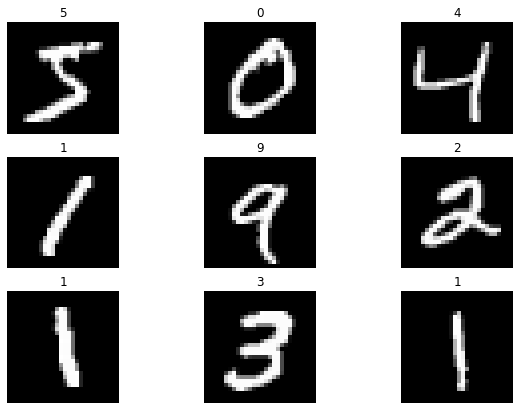

In [2]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

In [3]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 ** 2)))

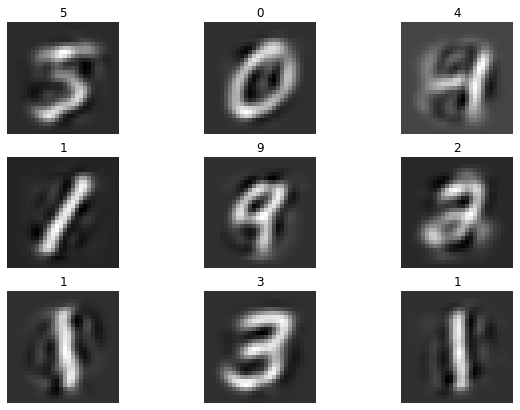

In [4]:
mnist_30comp = model_pca.transform(mnist['images'].reshape((-1, 28 ** 2)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist_30comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

In [5]:
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=1)

In [6]:
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.158s...
[t-SNE] Computed neighbors for 10000 samples in 13.757s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 279.559349
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.301758
[t-SNE] KL divergence after 1000 iterations: 1.699996


In [7]:
mnist_tsne.shape

(10000, 2)

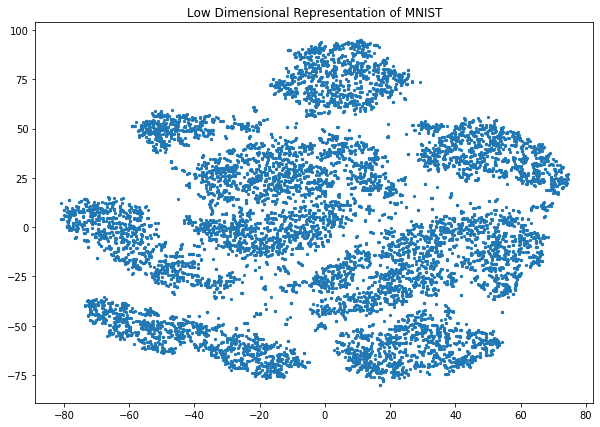

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:,0], mnist_tsne[:,1], s=5)
plt.title('Low Dimensional Representation of MNIST');

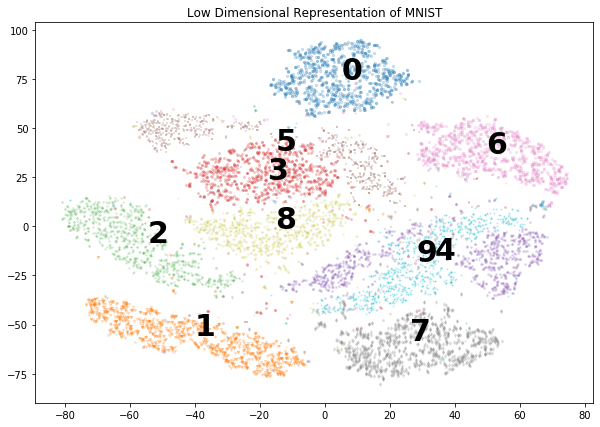

In [9]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()

In [10]:
threes = np.where(mnist['labels'] == 3)[0]
threes

array([   7,   10,   12, ..., 9974, 9977, 9991], dtype=int64)

In [11]:
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:,0]< -30)[0]
far_threes

array([   0,   11,   14,   17,   18,   19,   21,   22,   25,   29,   30,
         31,   32,   34,   35,   37,   39,   41,   42,   43,   51,   54,
         55,   56,   58,   60,   63,   66,   67,   68,   74,   76,   78,
         79,   80,   94,   96,   98,   99,  101,  102,  105,  107,  110,
        114,  116,  120,  122,  123,  126,  128,  133,  137,  142,  143,
        144,  145,  151,  152,  158,  169,  170,  171,  183,  184,  188,
        207,  227,  229,  230,  232,  235,  237,  238,  239,  240,  243,
        244,  245,  247,  263,  292,  294,  295,  303,  307,  308,  313,
        315,  319,  327,  335,  337,  346,  368,  370,  373,  379,  385,
        387,  388,  389,  398,  406,  410,  421,  422,  424,  427,  431,
        432,  433,  437,  438,  439,  457,  467,  493,  495,  497,  498,
        503,  505,  506,  507,  512,  517,  523,  554,  555,  557,  560,
        561,  563,  564,  567,  569,  571,  574,  579,  581,  583,  585,
        588,  593,  594,  595,  596,  598,  600,  6

In [12]:
tsne_threes[far_threes]

array([[-32.119    ,  16.190784 ],
       [-33.198112 ,  26.013874 ],
       [-33.488453 ,  27.551619 ],
       [-34.523907 ,  26.634068 ],
       [-30.826197 ,  14.385183 ],
       [-37.32901  ,  15.137681 ],
       [-37.04024  ,  15.271422 ],
       [-38.383896 ,  15.578539 ],
       [-31.579344 ,  27.94891  ],
       [-33.46005  ,  27.690805 ],
       [-31.851072 ,  15.978311 ],
       [-30.991354 ,  25.93165  ],
       [-33.042046 ,  29.421732 ],
       [-32.64938  ,  28.396109 ],
       [-33.54818  ,  29.14886  ],
       [-32.123116 ,  25.005003 ],
       [-32.549744 ,  15.768647 ],
       [-32.142582 ,  25.031294 ],
       [-39.922386 ,  25.141697 ],
       [-31.830849 ,  30.082232 ],
       [-35.172363 ,  10.41482  ],
       [-37.22617  ,  27.700098 ],
       [-37.226494 ,  27.866198 ],
       [-37.630962 ,  28.172274 ],
       [-35.619373 ,  28.247128 ],
       [-35.18637  ,  17.423119 ],
       [-35.219604 ,  11.1331215],
       [-32.825333 ,  28.784986 ],
       [-33.729485 ,

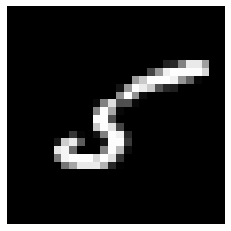

In [13]:
plt.imshow(mnist['images'][11], cmap='gray')
plt.axis('off');